In [1]:
import pandas as pd

In [2]:
from risk_experiment.utils import Subject

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [3]:
sub = Subject('25', '/data/ds-risk')

In [18]:
tmp = sub.get_fmri_events(session='3t2').set_index(['trial_nr', 'onset'], append=True).sort_index().reset_index('onset')

tmp['onset_diff'] = tmp['onset'].diff()
# tmp['trial_type'] = tmp['trial_type'].map(lambda x: )
tmp.groupby('event')['onset_diff'].describe()

tmp

onset    trial_type  duration event    n2  \
session run trial_nr                                                   
3t2     1   1          13.249412  trial_001_n1       0.6    n1   NaN   
            1          19.451165         n2_19       0.6    n2  19.0   
            2          25.898175  trial_002_n1       0.6    n1   NaN   
            2          34.098971         n2_11       0.6    n2  11.0   
            3          41.047738  trial_003_n1       0.6    n1   NaN   
...                          ...           ...       ...   ...   ...   
        8   190       328.100168         n2_14       0.6    n2  14.0   
            191       335.050046  trial_191_n1       0.6    n1   NaN   
            191       343.247630          n2_5       0.6    n2   5.0   
            192       349.202138  trial_192_n1       0.6    n1   NaN   
            192       356.399939         n2_14       0.6    n2  14.0   

                      onset_diff  
session run trial_nr              
3t2     1   1                NaN  
            1           6.201753  
            2           6.447010  
            2           8.200796  
            3           6.948766  
...                          ...  
        8   190         6.197419  
            191         6.949878  
            191         8.197584  
            192         5.954507  
            192         7.197801  

[384 rows x 6 columns]

In [26]:
ts1 = sub.get_roi_timeseries('7t2', 'vtav2', True, pca=False)
ts2 = sub.get_roi_timeseries('7t2', 'vtav2', True, pca=True)

version                         v1        v2
subject session trial_nr                    
25      7t2     1        -0.529640 -0.463451
                2        -0.086502 -1.082514
                3        -0.121189  0.912139
                4        -0.102786 -1.692630
                5         0.341182 -0.013765
...                            ...       ...
                188      -0.357129  1.778010
                189       0.755170  2.903132
                190      -0.433946 -0.916392
                191       0.360931  1.026458
                192      -0.393571 -2.591746

[192 rows x 2 columns]

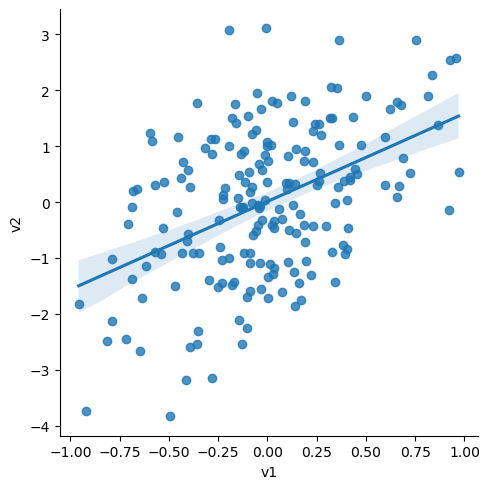

In [27]:
import seaborn as sns
df = pd.concat((ts1, ts2), keys=['v1', 'v2'], names=['version'])
df= df.unstack('version').droplevel(0, axis=1)

sns.lmplot(df, x='v1', y='v2')
df